In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart_disease_detection.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: xlabel='TenYearCHD', ylabel='count'>

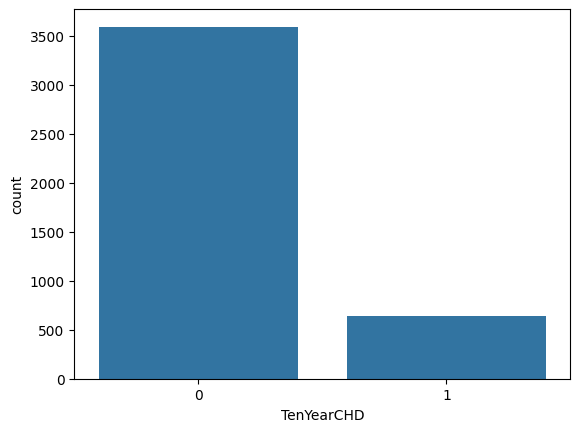

In [ ]:
sns.countplot(df,x='TenYearCHD')

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(3656, 16)

In [ ]:
# X Data
X = df.iloc[:, :-1]
# y Data
y = df.iloc[:, -1]

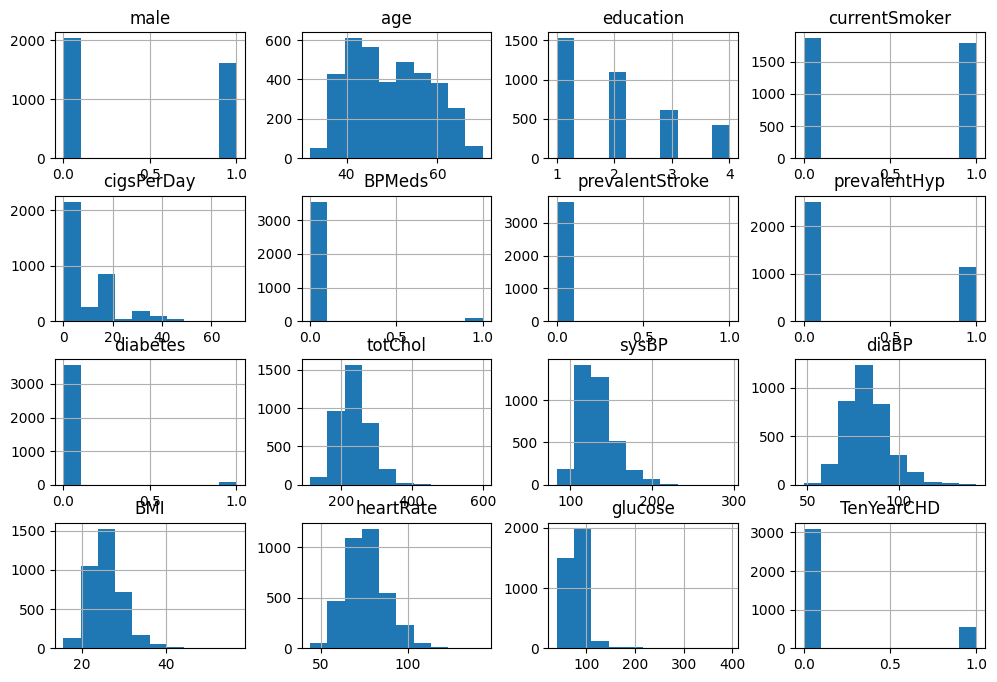

In [ ]:
# Create histograms for all numerical columns
df.select_dtypes(include='number').hist(figsize=(12, 8))
plt.show()

In [ ]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = 'TenYearCHD'),df['TenYearCHD'], test_size=0.2, random_state=42 )

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
imputer = SimpleImputer(strategy='mean')
ct = ColumnTransformer(
    transformers=[
        ('tnf1', imputer,['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'])
    ],
    remainder='passthrough'
)

In [ ]:
newx_train = ct.fit_transform(x_train)
newx_test = ct.transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(newx_train,y_train)
clf2.fit(newx_train,y_train)

y_pred = clf.predict(newx_test)
y_pred1 = clf2.predict(newx_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.8346994535519126
Accuracy DT 0.7486338797814208


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(newx_train)
X_test_transformed = trf.transform(newx_test)
clf = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
clf3.fit(X_train_transformed, y_train)
clf4.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
y_pred2 = clf3.predict(X_test_transformed)
y_pred3 = clf4.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))
print("Accuracy K-NN:", accuracy_score(y_test, y_pred2))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred3))

Accuracy LR 0.8360655737704918
Accuracy DT 0.73224043715847
Accuracy K-NN: 0.8278688524590164
Accuracy Random Forest: 0.8333333333333334


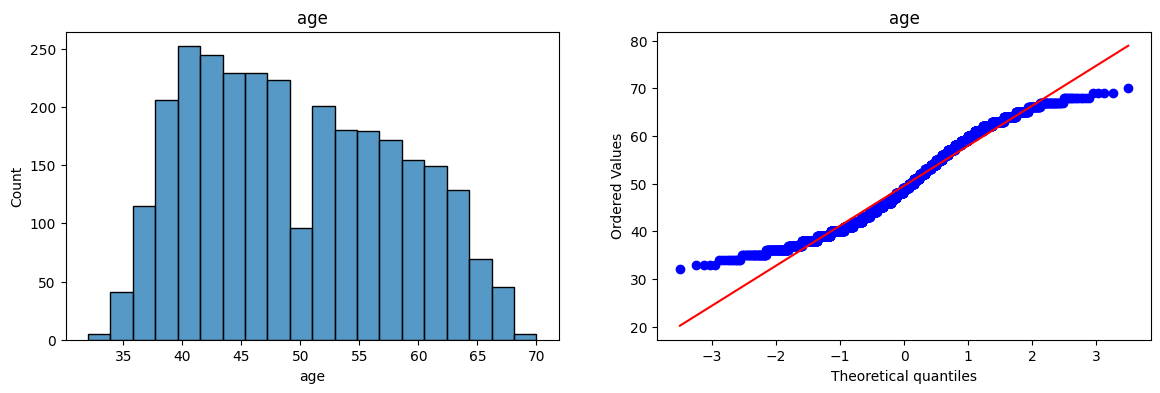

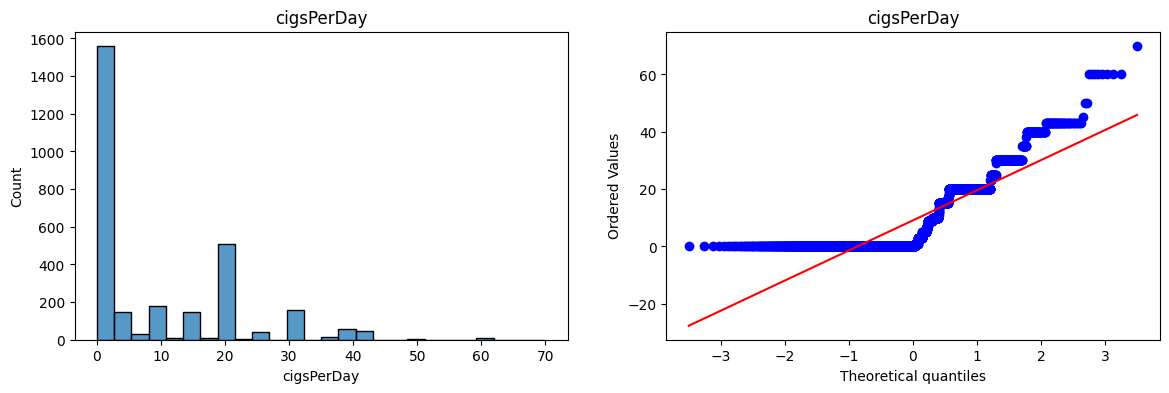

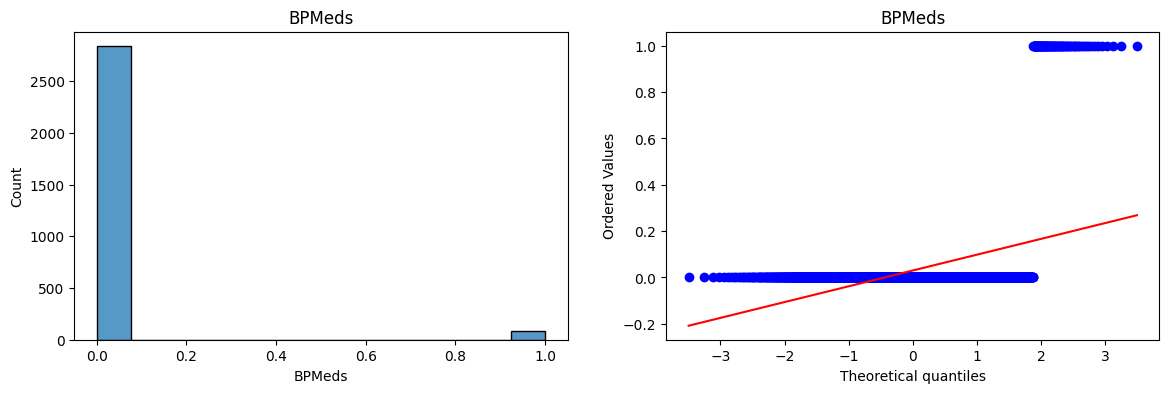

In [ ]:
import scipy.stats as stats
columns_to_plot = ["cigsPerDay", "BPMeds", "age"]

for col in x_train.columns:
    if col in columns_to_plot:
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.histplot(x_train[col])
        plt.title(col)

        plt.subplot(122)
        stats.probplot(x_train[col], dist="norm", plot=plt)
        plt.title(col)

        plt.show()